In [1]:
# # python3 /home/rnb/Projects/rnb-planning/src/pkg/planning/filtering/lattice_model/shared_lattice_predictor.py --rtype panda

# import SharedArray as sa
# ROBOT_TYPE_NAME = 'panda'
# sa.delete("shm://{}.prepared".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.grasp_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.arm_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.rh_vals".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.result".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_in".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.response_out".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_quit".format(ROBOT_TYPE_NAME))

In [1]:
from __future__ import print_function
import os
import sys
RNB_PLANNING_DIR = os.environ["RNB_PLANNING_DIR"]
sys.path.append(os.path.join(RNB_PLANNING_DIR, 'src'))
from pkg.controller.combined_robot import *
from pkg.utils.utils import get_now, try_mkdir
import subprocess

DATA_PATH = os.path.join(RNB_PLANNING_DIR, "data")
try_mkdir(DATA_PATH)

DAT_ROOT = "stowing-deep"
TEST_DATA_PATH = os.path.join(DATA_PATH, DAT_ROOT)
try_mkdir(TEST_DATA_PATH)

IK_TRY_NUM = 10
MP_TIMES = [0.1,0.2,0.5,1.0,2.0,3.0,5.0]
RESULT_PATHS = []
for mp_time in MP_TIMES:
    RES_ROOT = "stowing-deep-result-new-lcheck-mvik{}_mp{:.3}".format(IK_TRY_NUM, mp_time)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

HEADS = ["plan_time", "length", "MP_count", "failed_MPs", "IK_count", "failed_IKs", "success"]

def run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=['None', 'Tool', 'ToolReach', 'Full']):
    N_DAT = I_END-I_START
    ROBOT_DATA_ROOT = os.path.join(TEST_DATA_PATH, RTYPE)
    DATASET_PATH = os.path.join(ROBOT_DATA_ROOT, DAT_DIR)
    file_list = sorted(os.listdir(DATASET_PATH))

    gtimer = GlobalTimer.instance()
    gtimer.reset(scale=1, timeunit='s')

    gtimer.tic("full_loop")
    for fid in range(I_START, I_END):
        e_step_list = []
        for i_c, cname in enumerate(CNAME_LIST):
            gtimer.tic("step")
            p = subprocess.Popen(['python', '{}src/scripts/developing/pddlstream/test_saved_scene.py'.format(RNB_PLANNING_DIR),
                                  '--data_idx', str(fid), '--file_option', FILE_OPTION, '--cname', cname,]
                                 + common_args)
            p.wait()
            e_step = np.round(gtimer.toc("step"), 1)
            e_step_list.append(e_step)
            print("------- " + ("{:<8}"*len(e_step_list)).format(*e_step_list) + "-------", end="\r")

        print("")
        print("========== {} / {} (eta: {} / {} s) =========".format(
            fid+1, N_DAT, *np.round(gtimer.eta("full_loop", fid-I_START+1, N_DAT), 1)))

## Common params

In [2]:
RTYPE = "panda"
DAT_DIR = '20210917-113211'
I_START = 0
I_END = 30


CNAME_LIST = ['None']
# CNAME_LIST = ['Full'] #,'Pairwise']
VISUALIZE = False
PLAY_RESULT = False
SHOW_STATE = False

TIMEOUT_MOTION = 5
MAX_TIME = 100
MAX_ITER = 100

GRASP_SAMPLE = 30
STABLE_SAMPLE = 50
SEARCH_SAMPLE_RATIO= 100
MAX_SKELETONS = 30
TIMED_COMPLETE = False
STACK_TIMELOG = True
IK_TRY_NUM = IK_TRY_NUM
VERBOSE = False
USE_MOVEIT_IK = True


common_args = [
            '--rtype', RTYPE,
            '--dat_root', DAT_ROOT,
            '--res_root', RES_ROOT,
            '--dat_dir', DAT_DIR,
            '--VISUALIZE', str(VISUALIZE),
            '--PLAY_RESULT', str(PLAY_RESULT),
            '--TIMEOUT_MOTION', str(TIMEOUT_MOTION),
            '--MAX_TIME', str(MAX_TIME),
            '--MAX_ITER', str(MAX_ITER), 
            '--GRASP_SAMPLE', str(GRASP_SAMPLE),
            '--STABLE_SAMPLE', str(STABLE_SAMPLE),
            '--SEARCH_SAMPLE_RATIO', str(SEARCH_SAMPLE_RATIO),
            '--MAX_SKELETONS', str(MAX_SKELETONS),
            '--TIMED_COMPLETE', str(TIMED_COMPLETE),
            '--STACK_TIMELOG', str(STACK_TIMELOG),
            '--IK_TRY_NUM', str(IK_TRY_NUM),
            '--VERBOSE', str(VERBOSE),
            '--USE_MOVEIT_IK', str(USE_MOVEIT_IK)]

## plot results

In [3]:
from plot_scripts import *

In [4]:
try:
    resdat_all_accum = defaultdict(dict)
    CHECKERS = []
    for mp_time in MP_TIMES:
        resdat_all, res_dict_all = print_results(RES_ROOT=
                                                 "stowing-deep-result-new-lcheck-mvik{}_mp{:.3}".format(IK_TRY_NUM, mp_time), 
                                                 RTYPE="panda", 
                                                 DAT_DIR='20210917-113211',
                                                 CNAMES_EXCLUDE=[], read_only=True
                                                )
        cname_cur = "{:03}".format(mp_time)
        CHECKERS.append(cname_cur)
        for key in resdat_all.keys():
            resdat_all_accum[key][cname_cur]=resdat_all[key]["None"]
except Exception as e:
    TextColors.RED.println("ERROR: "+str(e))
    TextColors.RED.println('If you have not run the test script on this computer yet, please run "test loop" section below')

RES_ROOT: stowing-deep-result-new-lcheck-mvik10_mp0.1
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik10_mp0.2
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik10_mp0.5
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik10_mp1.0
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik10_mp2.0
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik10_mp3.0
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-new-lcheck-mvik10_mp5.0
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']


Text(0.5,1,'success ratios tot')

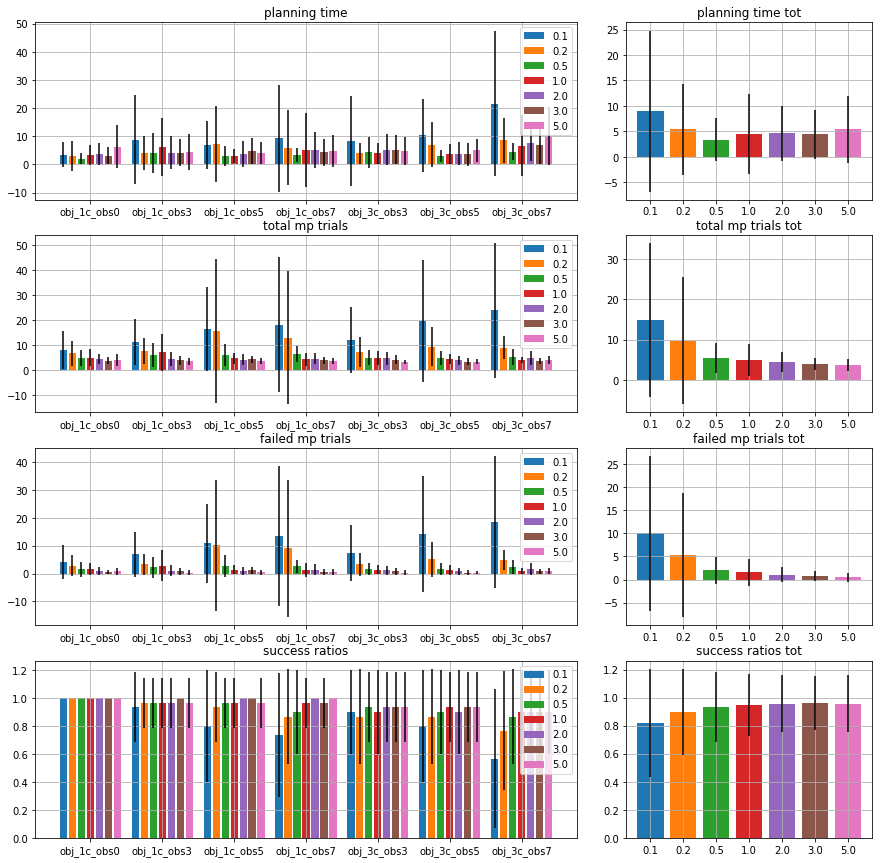

In [5]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,(1, 2))
_ = plot_log(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS)
plt.title("planning time")
plt.subplot(4,3,3)
time_dict = plot_log(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, average_all=True)
plt.title("planning time tot")

plt.subplot(4,3,(4, 5))
_ = plot_log(resdat_all_accum, keys=["MP_tot"], CHECKERS=CHECKERS)
plt.title("total mp trials")
plt.subplot(4,3,6)
_ = plot_log(resdat_all_accum, keys=["MP_tot"], CHECKERS=CHECKERS, average_all=True)
plt.title("total mp trials tot")

plt.subplot(4,3,(7, 8))
_ = plot_log(resdat_all_accum, keys=["failed_MPs"], CHECKERS=CHECKERS)
plt.title("failed mp trials")
plt.subplot(4,3,9)
_ = plot_log(resdat_all_accum, keys=["failed_MPs"], CHECKERS=CHECKERS, average_all=True)
plt.title("failed mp trials tot")

plt.subplot(4,3,(10, 11))
succ_dict = extract_values(resdat_all_accum, ["success"])
_ = grouped_bar(succ_dict)
plt.title("success ratios")
plt.subplot(4,3,12)
_ = grouped_bar(succ_dict, average_all=True)
plt.title("success ratios tot")

In [6]:
print("="*80)
success_vecs = [np.concatenate(map(lambda x: x["{:03}".format(mp_num)], succ_dict.values())) for mp_num in MP_TIMES]
success_means = map(np.mean, success_vecs)
max_val = np.max(success_means)
max_idc = np.where(success_means==max_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), MP_TIMES)))
print("success: ", "  ".join(map(lambda x:"{:5.03}".format(x), success_means)))
print("best: {} ({:5.3})".format(np.array(MP_TIMES)[max_idc], max_val))
print("-"*80)
time_vecs = [np.concatenate(map(lambda x: x["{:03}".format(mp_num)], time_dict.values())) for mp_num in MP_TIMES]
time_means = np.array(map(np.mean, time_vecs))
min_val = np.min(time_means[max_idc])
min_idc = np.where(time_means[max_idc]==min_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), MP_TIMES)))
print("times  : ", "  ".join(map(lambda x:"{:5.03}".format(x), time_means)))
print("best: {} ({:5.3})".format(np.array(MP_TIMES)[max_idc][min_idc], min_val))
print("="*80)

MP_TIMES:    0.1    0.2    0.5    1.0    2.0    3.0    5.0
success:  0.819  0.895  0.933  0.948  0.957  0.962  0.957
best: [3.] (0.962)
--------------------------------------------------------------------------------
MP_TIMES:    0.1    0.2    0.5    1.0    2.0    3.0    5.0
times  :   8.98   5.38    3.4   4.46   4.65   4.45   5.41
best: [3.] ( 4.45)


# test loop

In [5]:
for mp_time, res_path in zip(MP_TIMES, RESULT_PATHS):
    common_args[common_args.index("--res_root")+1] = res_path
    common_args[common_args.index("--TIMEOUT_MOTION")+1] = str(mp_time)
    FILE_OPTION = "obj_1c_obs0"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

------- 13.7    -------
========== 1 / 30 (eta: 13.7 / 411.9 s) =========
------- 18.5    -------
========== 2 / 30 (eta: 32.2 / 483.5 s) =========
------- 12.5    -------
========== 3 / 30 (eta: 44.7 / 447.2 s) =========
------- 6.6     -------
========== 4 / 30 (eta: 51.3 / 385.0 s) =========
------- 5.7     -------
========== 5 / 30 (eta: 57.0 / 342.2 s) =========
------- 8.3     -------
========== 6 / 30 (eta: 65.3 / 326.7 s) =========
------- 6.3     -------
========== 7 / 30 (eta: 71.6 / 307.0 s) =========
------- 6.0     -------
========== 8 / 30 (eta: 77.6 / 291.1 s) =========
------- 6.0     -------
========== 9 / 30 (eta: 83.6 / 278.6 s) =========
------- 7.8     -------
========== 10 / 30 (eta: 91.4 / 274.2 s) =========
------- 6.3     -------
========== 11 / 30 (eta: 97.7 / 266.6 s) =========
------- 9.6     -------
========== 12 / 30 (eta: 107.3 / 268.3 s) =========
------- 8.9     -------
========== 13 / 30 (eta: 116.2 / 268.3 s) =========
------- 6.2     -------
========

------- 7.1     -------
========== 20 / 30 (eta: 602.8 / 904.2 s) =========
------- 86.8    -------
========== 21 / 30 (eta: 689.6 / 985.1 s) =========
------- 105.4   -------
========== 22 / 30 (eta: 795.0 / 1084.1 s) =========
------- 12.9    -------
========== 23 / 30 (eta: 807.9 / 1053.8 s) =========
------- 7.8     -------
========== 24 / 30 (eta: 815.7 / 1019.6 s) =========
------- 17.5    -------
========== 25 / 30 (eta: 833.2 / 999.9 s) =========
------- 105.4   -------
========== 26 / 30 (eta: 938.6 / 1083.1 s) =========
------- 6.0     -------
========== 27 / 30 (eta: 944.6 / 1049.6 s) =========
------- 11.9    -------
========== 28 / 30 (eta: 956.6 / 1024.9 s) =========
------- 105.5   -------
========== 29 / 30 (eta: 1062.1 / 1098.7 s) =========
------- 105.3   -------
========== 30 / 30 (eta: 1167.3 / 1167.3 s) =========
------- 14.7    -------
========== 1 / 30 (eta: 14.7 / 441.3 s) =========
------- 6.8     -------
========== 2 / 30 (eta: 21.5 / 322.8 s) =========
------

------- 6.3     -------
========== 8 / 30 (eta: 64.1 / 240.3 s) =========
------- 9.6     -------
========== 9 / 30 (eta: 73.7 / 245.6 s) =========
------- 9.8     -------
========== 10 / 30 (eta: 83.5 / 250.6 s) =========
------- 6.7     -------
========== 11 / 30 (eta: 90.2 / 246.1 s) =========
------- 7.6     -------
========== 12 / 30 (eta: 97.9 / 244.7 s) =========
------- 9.0     -------
========== 13 / 30 (eta: 106.9 / 246.7 s) =========
------- 6.0     -------
========== 14 / 30 (eta: 112.9 / 241.9 s) =========
------- 6.6     -------
========== 15 / 30 (eta: 119.5 / 239.0 s) =========
------- 6.0     -------
========== 16 / 30 (eta: 125.5 / 235.3 s) =========
------- 11.5    -------
========== 17 / 30 (eta: 137.0 / 241.8 s) =========
------- 6.7     -------
========== 18 / 30 (eta: 143.7 / 239.5 s) =========
------- 9.6     -------
========== 19 / 30 (eta: 153.3 / 242.1 s) =========
------- 5.9     -------
========== 20 / 30 (eta: 159.2 / 238.9 s) =========
------- 6.3     ---

------- 7.7     -------
========== 27 / 30 (eta: 631.4 / 701.5 s) =========
------- 12.9    -------
========== 28 / 30 (eta: 644.3 / 690.3 s) =========
------- 105.7   -------
========== 29 / 30 (eta: 750.0 / 775.8 s) =========
------- 48.9    -------
========== 30 / 30 (eta: 798.9 / 798.9 s) =========
------- 7.9     -------
========== 1 / 30 (eta: 7.9 / 238.2 s) =========
------- 7.0     -------
========== 2 / 30 (eta: 15.0 / 224.7 s) =========
------- 6.8     -------
========== 3 / 30 (eta: 21.8 / 217.9 s) =========
------- 6.6     -------
========== 4 / 30 (eta: 28.4 / 212.9 s) =========
------- 13.1    -------
========== 5 / 30 (eta: 41.5 / 249.0 s) =========
------- 7.7     -------
========== 6 / 30 (eta: 49.2 / 246.2 s) =========
------- 111.7   -------
========== 7 / 30 (eta: 160.9 / 689.7 s) =========
------- 6.9     -------
========== 8 / 30 (eta: 167.9 / 629.5 s) =========
------- 11.3    -------
========== 9 / 30 (eta: 179.2 / 597.3 s) =========
------- 15.9    -------
====

------- 6.2     -------
========== 16 / 30 (eta: 121.6 / 228.1 s) =========
------- 14.8    -------
========== 17 / 30 (eta: 136.5 / 240.8 s) =========
------- 6.3     -------
========== 18 / 30 (eta: 142.8 / 237.9 s) =========
------- 6.3     -------
========== 19 / 30 (eta: 149.1 / 235.4 s) =========
------- 9.6     -------
========== 20 / 30 (eta: 158.7 / 238.1 s) =========
------- 6.8     -------
========== 21 / 30 (eta: 165.5 / 236.5 s) =========
------- 6.7     -------
========== 22 / 30 (eta: 172.2 / 234.9 s) =========
------- 7.2     -------
========== 23 / 30 (eta: 179.4 / 234.1 s) =========
------- 11.6    -------
========== 24 / 30 (eta: 191.1 / 238.8 s) =========
------- 6.3     -------
========== 25 / 30 (eta: 197.4 / 236.9 s) =========
------- 7.0     -------
========== 26 / 30 (eta: 204.4 / 235.8 s) =========
------- 7.0     -------
========== 27 / 30 (eta: 211.4 / 234.9 s) =========
------- 6.1     -------
========== 28 / 30 (eta: 217.5 / 233.0 s) =========
------- 6.6 

------- 11.8    -------
========== 5 / 30 (eta: 46.4 / 278.3 s) =========
------- 6.9     -------
========== 6 / 30 (eta: 53.3 / 266.4 s) =========
------- 40.8    -------
========== 7 / 30 (eta: 94.1 / 403.3 s) =========
------- 6.9     -------
========== 8 / 30 (eta: 101.0 / 378.6 s) =========
------- 8.7     -------
========== 9 / 30 (eta: 109.7 / 365.6 s) =========
------- 9.0     -------
========== 10 / 30 (eta: 118.7 / 356.0 s) =========
------- 11.2    -------
========== 11 / 30 (eta: 129.9 / 354.2 s) =========
------- 8.0     -------
========== 12 / 30 (eta: 137.9 / 344.7 s) =========
------- 6.2     -------
========== 13 / 30 (eta: 144.1 / 332.6 s) =========
------- 7.8     -------
========== 14 / 30 (eta: 152.0 / 325.6 s) =========
------- 21.0    -------
========== 15 / 30 (eta: 173.0 / 346.0 s) =========
------- 75.5    -------
========== 16 / 30 (eta: 248.5 / 465.8 s) =========
------- 13.9    -------
========== 17 / 30 (eta: 262.4 / 463.0 s) =========
------- 105.7   ----

------- 9.2     -------
========== 24 / 30 (eta: 228.4 / 285.5 s) =========
------- 7.4     -------
========== 25 / 30 (eta: 235.8 / 282.9 s) =========
------- 9.5     -------
========== 26 / 30 (eta: 245.2 / 283.0 s) =========
------- 7.7     -------
========== 27 / 30 (eta: 253.0 / 281.1 s) =========
------- 9.2     -------
========== 28 / 30 (eta: 262.2 / 281.0 s) =========
------- 6.0     -------
========== 29 / 30 (eta: 268.2 / 277.5 s) =========
------- 7.5     -------
========== 30 / 30 (eta: 275.7 / 275.7 s) =========
------- 8.5     -------
========== 1 / 30 (eta: 8.5 / 255.9 s) =========
------- 17.8    -------
========== 2 / 30 (eta: 26.3 / 395.0 s) =========
------- 11.0    -------
========== 3 / 30 (eta: 37.3 / 373.4 s) =========
------- 6.5     -------
========== 4 / 30 (eta: 43.8 / 328.8 s) =========
------- 6.6     -------
========== 5 / 30 (eta: 50.5 / 302.7 s) =========
------- 7.2     -------
========== 6 / 30 (eta: 57.7 / 288.4 s) =========
------- 6.6     -------
=

------- 6.3     -------
========== 13 / 30 (eta: 149.1 / 344.0 s) =========
------- 9.2     -------
========== 14 / 30 (eta: 158.3 / 339.2 s) =========
------- 7.3     -------
========== 15 / 30 (eta: 165.6 / 331.3 s) =========
------- 31.8    -------
========== 16 / 30 (eta: 197.5 / 370.2 s) =========
------- 8.7     -------
========== 17 / 30 (eta: 206.2 / 363.8 s) =========
------- 105.8   -------
========== 18 / 30 (eta: 311.9 / 519.9 s) =========
------- 6.5     -------
========== 19 / 30 (eta: 318.5 / 502.9 s) =========
------- 7.7     -------
========== 20 / 30 (eta: 326.2 / 489.3 s) =========
------- 105.7   -------
========== 21 / 30 (eta: 431.9 / 616.9 s) =========
------- 8.3     -------
========== 22 / 30 (eta: 440.2 / 600.2 s) =========
------- 8.3     -------
========== 23 / 30 (eta: 448.5 / 585.0 s) =========
------- 10.3    -------
========== 24 / 30 (eta: 458.8 / 573.5 s) =========
------- 105.8   -------
========== 25 / 30 (eta: 564.6 / 677.6 s) =========
------- 12.5

------- 8.7     -------
========== 2 / 30 (eta: 15.6 / 234.5 s) =========
------- 10.4    -------
========== 3 / 30 (eta: 26.1 / 260.6 s) =========
------- 6.3     -------
========== 4 / 30 (eta: 32.4 / 242.8 s) =========
------- 6.5     -------
========== 5 / 30 (eta: 38.9 / 233.2 s) =========
------- 8.7     -------
========== 6 / 30 (eta: 47.6 / 238.0 s) =========
------- 6.7     -------
========== 7 / 30 (eta: 54.3 / 232.7 s) =========
------- 13.2    -------
========== 8 / 30 (eta: 67.5 / 253.1 s) =========
------- 8.5     -------
========== 9 / 30 (eta: 76.0 / 253.4 s) =========
------- 11.1    -------
========== 10 / 30 (eta: 87.2 / 261.5 s) =========
------- 8.1     -------
========== 11 / 30 (eta: 95.3 / 259.9 s) =========
------- 10.1    -------
========== 12 / 30 (eta: 105.4 / 263.5 s) =========
------- 8.6     -------
========== 13 / 30 (eta: 114.0 / 263.1 s) =========
------- 10.7    -------
========== 14 / 30 (eta: 124.7 / 267.2 s) =========
------- 6.7     -------
======

------- 105.9   -------
========== 21 / 30 (eta: 470.0 / 671.4 s) =========
------- 7.7     -------
========== 22 / 30 (eta: 477.7 / 651.4 s) =========
------- 9.4     -------
========== 23 / 30 (eta: 487.1 / 635.3 s) =========
------- 8.3     -------
========== 24 / 30 (eta: 495.4 / 619.3 s) =========
------- 100.2   -------
========== 25 / 30 (eta: 595.6 / 714.8 s) =========
------- 9.1     -------
========== 26 / 30 (eta: 604.8 / 697.8 s) =========
------- 18.5    -------
========== 27 / 30 (eta: 623.3 / 692.6 s) =========
------- 28.3    -------
========== 28 / 30 (eta: 651.7 / 698.2 s) =========
------- 10.9    -------
========== 29 / 30 (eta: 662.6 / 685.4 s) =========
------- 8.1     -------
========== 30 / 30 (eta: 670.7 / 670.7 s) =========
------- 6.5     -------
========== 1 / 30 (eta: 6.5 / 195.8 s) =========
------- 12.3    -------
========== 2 / 30 (eta: 18.8 / 282.6 s) =========
------- 7.1     -------
========== 3 / 30 (eta: 25.9 / 259.4 s) =========
------- 10.9    ---

------- 11.7    -------
========== 10 / 30 (eta: 91.2 / 273.7 s) =========
------- 7.4     -------
========== 11 / 30 (eta: 98.7 / 269.1 s) =========
------- 18.2    -------
========== 12 / 30 (eta: 116.9 / 292.2 s) =========
------- 6.3     -------
========== 13 / 30 (eta: 123.2 / 284.2 s) =========
------- 7.5     -------
========== 14 / 30 (eta: 130.7 / 280.0 s) =========
------- 8.0     -------
========== 15 / 30 (eta: 138.7 / 277.4 s) =========
------- 7.8     -------
========== 16 / 30 (eta: 146.5 / 274.8 s) =========
------- 7.5     -------
========== 17 / 30 (eta: 154.1 / 271.9 s) =========
------- 8.3     -------
========== 18 / 30 (eta: 162.4 / 270.7 s) =========
------- 12.3    -------
========== 19 / 30 (eta: 174.6 / 275.8 s) =========
------- 49.1    -------
========== 20 / 30 (eta: 223.7 / 335.6 s) =========
------- 10.1    -------
========== 21 / 30 (eta: 233.8 / 334.0 s) =========
------- 8.1     -------
========== 22 / 30 (eta: 241.9 / 329.9 s) =========
------- 6.8   

------- 10.8    -------
========== 29 / 30 (eta: 577.4 / 597.3 s) =========
------- 6.8     -------
========== 30 / 30 (eta: 584.2 / 584.2 s) =========
------- 6.8     -------
========== 1 / 30 (eta: 6.8 / 204.5 s) =========
------- 7.7     -------
========== 2 / 30 (eta: 14.5 / 217.9 s) =========
------- 6.9     -------
========== 3 / 30 (eta: 21.4 / 214.2 s) =========
------- 10.7    -------
========== 4 / 30 (eta: 32.1 / 241.0 s) =========
------- 7.4     -------
========== 5 / 30 (eta: 39.6 / 237.4 s) =========
------- 8.9     -------
========== 6 / 30 (eta: 48.5 / 242.6 s) =========
------- 8.9     -------
========== 7 / 30 (eta: 57.4 / 246.2 s) =========
------- 9.1     -------
========== 8 / 30 (eta: 66.6 / 249.7 s) =========
------- 7.0     -------
========== 9 / 30 (eta: 73.6 / 245.4 s) =========
------- 7.1     -------
========== 10 / 30 (eta: 80.8 / 242.3 s) =========
------- 10.3    -------
========== 11 / 30 (eta: 91.1 / 248.5 s) =========
------- 114.4   -------
=========

------- 6.5     -------
========== 18 / 30 (eta: 142.4 / 237.4 s) =========
------- 12.8    -------
========== 19 / 30 (eta: 155.2 / 245.1 s) =========
------- 109.2   -------
========== 20 / 30 (eta: 264.4 / 396.7 s) =========
------- 13.6    -------
========== 21 / 30 (eta: 278.1 / 397.2 s) =========
------- 55.4    -------
========== 22 / 30 (eta: 333.5 / 454.8 s) =========
------- 17.6    -------
========== 23 / 30 (eta: 351.1 / 458.0 s) =========
------- 6.6     -------
========== 24 / 30 (eta: 357.8 / 447.2 s) =========
------- 6.2     -------
========== 25 / 30 (eta: 364.0 / 436.8 s) =========
------- 14.8    -------
========== 26 / 30 (eta: 378.8 / 437.1 s) =========
------- 38.6    -------
========== 27 / 30 (eta: 417.4 / 463.8 s) =========
------- 7.3     -------
========== 28 / 30 (eta: 424.7 / 455.0 s) =========
------- 9.8     -------
========== 29 / 30 (eta: 434.5 / 449.5 s) =========
------- 18.3    -------
========== 30 / 30 (eta: 452.8 / 452.8 s) =========
------- 6.9 

------- 19.3    -------
========== 7 / 30 (eta: 76.7 / 328.9 s) =========
------- 9.5     -------
========== 8 / 30 (eta: 86.2 / 323.4 s) =========
------- 7.7     -------
========== 9 / 30 (eta: 94.0 / 313.3 s) =========
------- 6.9     -------
========== 10 / 30 (eta: 100.8 / 302.5 s) =========
------- 11.5    -------
========== 11 / 30 (eta: 112.4 / 306.4 s) =========
------- 109.8   -------
========== 12 / 30 (eta: 222.2 / 555.4 s) =========
------- 14.1    -------
========== 13 / 30 (eta: 236.2 / 545.1 s) =========
------- 12.5    -------
========== 14 / 30 (eta: 248.7 / 533.0 s) =========
------- 8.0     -------
========== 15 / 30 (eta: 256.7 / 513.5 s) =========
------- 22.8    -------
========== 16 / 30 (eta: 279.6 / 524.2 s) =========
------- 12.8    -------
========== 17 / 30 (eta: 292.3 / 515.9 s) =========
------- 10.5    -------
========== 18 / 30 (eta: 302.8 / 504.7 s) =========
------- 10.4    -------
========== 19 / 30 (eta: 313.3 / 494.6 s) =========
------- 8.0     --